In [5]:
import pandas as pd
import numpy as np

In [ ]:
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [6]:
data = pd.read_excel("C:\Users\cipher\Desktop\BOP\BL_1 Data (1).xlsx",dtype=str)
data.dtypes


AC_ENTRY_SR_NO_traxlogid    object
AC_NO                       object
TRN_CODE                    object
DRCR_IND                    object
LCY_AMOUNT                  object
TXN_DT_TIME                 object
CUSTOMER_NO                 object
UNIQUE_ID_VALUE             object
RESPONSE_CODE               object
CHANNEL                     object
EXTERNAL_AGENT_ID           object
STATUS                      object
dtype: object

In [7]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
data.head(1)

,AC_ENTRY_SR_NO_traxlogid,AC_NO,TRN_CODE,DRCR_IND,LCY_AMOUNT,TXN_DT_TIME,CUSTOMER_NO,UNIQUE_ID_VALUE,RESPONSE_CODE,CHANNEL,EXTERNAL_AGENT_ID,STATUS
0,10290948,9040078729200014,ACW,D,1000.0000,2023-07-10 09:54:27,00787292,3230351966384,200,SuperAgentOnBoarding,BAFL0214,Suspect


In [8]:
data.isnull().sum()

AC_ENTRY_SR_NO_traxlogid       0
AC_NO                          0
TRN_CODE                       0
DRCR_IND                       0
LCY_AMOUNT                     0
TXN_DT_TIME                    0
CUSTOMER_NO                    0
UNIQUE_ID_VALUE                0
RESPONSE_CODE               4927
CHANNEL                     4927
EXTERNAL_AGENT_ID           4927
STATUS                         0
dtype: int64

In [9]:
data= data.fillna({"EXTERNAL_AGENT_ID": "No"})
data=data.fillna({"CHANNEL":"0"})
data=data.fillna({"RESPONSE_CODE":"0"})

In [10]:
data['AC_ENTRY_SR_NO_traxlogid']=data['AC_ENTRY_SR_NO_traxlogid'].astype(np.int64)
data['AC_NO'] = data['AC_NO'].astype(np.int64)
data['LCY_AMOUNT'] = data['LCY_AMOUNT'].astype(np.double)
data['CUSTOMER_NO'] = data['CUSTOMER_NO'].astype(np.int64)
data['UNIQUE_ID_VALUE'] = data['UNIQUE_ID_VALUE'].astype(np.int64)
data['TXN_DT_TIME'] = pd.to_datetime(data['TXN_DT_TIME'])
data.info()
data.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9548 entries, 0 to 9547
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   AC_ENTRY_SR_NO_traxlogid  9548 non-null   int64         
 1   AC_NO                     9548 non-null   int64         
 2   TRN_CODE                  9548 non-null   object        
 3   DRCR_IND                  9548 non-null   object        
 4   LCY_AMOUNT                9548 non-null   float64       
 5   TXN_DT_TIME               9548 non-null   datetime64[ns]
 6   CUSTOMER_NO               9548 non-null   int64         
 7   UNIQUE_ID_VALUE           9548 non-null   int64         
 8   RESPONSE_CODE             9548 non-null   object        
 9   CHANNEL                   9548 non-null   object        
 10  EXTERNAL_AGENT_ID         9548 non-null   object        
 11  STATUS                    9548 non-null   object        
dtypes: datetime64[ns](1)

,AC_ENTRY_SR_NO_traxlogid,AC_NO,TRN_CODE,DRCR_IND,LCY_AMOUNT,TXN_DT_TIME,CUSTOMER_NO,UNIQUE_ID_VALUE,RESPONSE_CODE,CHANNEL,EXTERNAL_AGENT_ID,STATUS
0,10290948,9040078729200014,ACW,D,1000.0,2023-07-10 09:54:27,787292,3230351966384,200,SuperAgentOnBoarding,BAFL0214,Suspect


In [11]:
data.head(1)

,AC_ENTRY_SR_NO_traxlogid,AC_NO,TRN_CODE,DRCR_IND,LCY_AMOUNT,TXN_DT_TIME,CUSTOMER_NO,UNIQUE_ID_VALUE,RESPONSE_CODE,CHANNEL,EXTERNAL_AGENT_ID,STATUS
0,10290948,9040078729200014,ACW,D,1000.0,2023-07-10 09:54:27,787292,3230351966384,200,SuperAgentOnBoarding,BAFL0214,Suspect


In [12]:
data = pd.concat([data[data.STATUS=='No Suspect'].sample(4586,random_state=111),
                   data[data.STATUS=='Suspect']
                  ])
data.STATUS.value_counts()

No Suspect    4586
Suspect       4586
Name: STATUS, dtype: int64

In [13]:
data.isnull().sum()

AC_ENTRY_SR_NO_traxlogid    0
AC_NO                       0
TRN_CODE                    0
DRCR_IND                    0
LCY_AMOUNT                  0
TXN_DT_TIME                 0
CUSTOMER_NO                 0
UNIQUE_ID_VALUE             0
RESPONSE_CODE               0
CHANNEL                     0
EXTERNAL_AGENT_ID           0
STATUS                      0
dtype: int64

In [14]:
cleanup_nums = {
                "STATUS":{"Suspect":1,"No Suspect":0}
                 }

In [15]:
data = data.replace(cleanup_nums)
data.head(4)

,AC_ENTRY_SR_NO_traxlogid,AC_NO,TRN_CODE,DRCR_IND,LCY_AMOUNT,TXN_DT_TIME,CUSTOMER_NO,UNIQUE_ID_VALUE,RESPONSE_CODE,CHANNEL,EXTERNAL_AGENT_ID,STATUS
1555,10315823,9010021877300013,CHW,D,6000.0,2023-07-10 12:59:27,218773,3620392080598,0,0,No,0
9271,10286911,6460120567000012,DPC,D,9500.0,2023-07-10 09:21:56,1205670,6982026,0,0,No,0
7343,10301152,6460120567000012,DPC,D,1000.0,2023-07-10 11:08:06,1205670,6982026,0,0,No,0
2215,10250871,9010037827700018,CHW,D,3500.0,2023-07-07 16:43:27,378277,3210278497126,0,0,No,0


In [16]:
object_columns = data.select_dtypes(include=['object']).columns
for c in object_columns:
    data[c] = data[c].str.strip()
    data[c] = data[c].apply(lambda x:x if x!='' else '0')
data.head(2)

,AC_ENTRY_SR_NO_traxlogid,AC_NO,TRN_CODE,DRCR_IND,LCY_AMOUNT,TXN_DT_TIME,CUSTOMER_NO,UNIQUE_ID_VALUE,RESPONSE_CODE,CHANNEL,EXTERNAL_AGENT_ID,STATUS
1555,10315823,9010021877300013,CHW,D,6000.0,2023-07-10 12:59:27,218773,3620392080598,0,0,No,0
9271,10286911,6460120567000012,DPC,D,9500.0,2023-07-10 09:21:56,1205670,6982026,0,0,No,0


In [17]:
data = data[sorted(data.columns)]

data.head(3)

,AC_ENTRY_SR_NO_traxlogid,AC_NO,CHANNEL,CUSTOMER_NO,DRCR_IND,EXTERNAL_AGENT_ID,LCY_AMOUNT,RESPONSE_CODE,STATUS,TRN_CODE,TXN_DT_TIME,UNIQUE_ID_VALUE
1555,10315823,9010021877300013,0,218773,D,No,6000.0,0,0,CHW,2023-07-10 12:59:27,3620392080598
9271,10286911,6460120567000012,0,1205670,D,No,9500.0,0,0,DPC,2023-07-10 09:21:56,6982026
7343,10301152,6460120567000012,0,1205670,D,No,1000.0,0,0,DPC,2023-07-10 11:08:06,6982026


In [18]:
data.STATUS.value_counts(dropna=False)

0    4586
1    4586
Name: STATUS, dtype: int64

In [19]:
import pycaret
from pycaret.utils import version
version()

'3.0.4'

In [20]:
from pycaret.classification import *
s = setup(data = data, target = 'STATUS', session_id=123)

,Description,Value
0,Session id,123
1,Target,STATUS
2,Target type,Binary
3,Original data shape,"(9172, 12)"
4,Transformed data shape,"(9172, 23)"
5,Transformed train set shape,"(6420, 23)"
6,Transformed test set shape,"(2752, 23)"
7,Ordinal features,2
8,Numeric features,5
9,Date features,1


In [21]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:30:25
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9974,0.0000,1.0000,0.9947,0.9974,0.9947,0.9947,0.6120
lda,Linear Discriminant Analysis,0.9974,0.9974,1.0000,0.9947,0.9974,0.9947,0.9947,0.6200
rf,Random Forest Classifier,0.9970,0.9996,0.9994,0.9947,0.9970,0.9941,0.9941,0.6690
gbc,Gradient Boosting Classifier,0.9970,0.9998,0.9994,0.9947,0.9970,0.9941,0.9941,0.6580
lightgbm,Light Gradient Boosting Machine,0.9964,0.9999,0.9978,0.9950,0.9964,0.9928,0.9928,0.6900
ada,Ada Boost Classifier,0.9963,0.9998,0.9978,0.9947,0.9963,0.9925,0.9925,0.6670
et,Extra Trees Classifier,0.9958,0.9996,0.9969,0.9947,0.9958,0.9916,0.9916,0.6780
dt,Decision Tree Classifier,0.9955,0.9955,0.9953,0.9956,0.9955,0.9910,0.9910,0.6030
knn,K Neighbors Classifier,0.9271,0.9707,0.9234,0.9306,0.9268,0.8542,0.8545,0.6150
qda,Quadratic Discriminant Analysis,0.8835,0.8835,0.7682,0.9987,0.8658,0.7670,0.7904,0.5950


In [22]:
data.fillna(0, inplace=True)

In [23]:
data.isnull().sum()

AC_ENTRY_SR_NO_traxlogid    0
AC_NO                       0
CHANNEL                     0
CUSTOMER_NO                 0
DRCR_IND                    0
EXTERNAL_AGENT_ID           0
LCY_AMOUNT                  0
RESPONSE_CODE               0
STATUS                      0
TRN_CODE                    0
TXN_DT_TIME                 0
UNIQUE_ID_VALUE             0
dtype: int64

In [24]:
4586 * 30 /100

1375.8

In [25]:
data.sample(frac=1)

,AC_ENTRY_SR_NO_traxlogid,AC_NO,CHANNEL,CUSTOMER_NO,DRCR_IND,EXTERNAL_AGENT_ID,LCY_AMOUNT,RESPONSE_CODE,STATUS,TRN_CODE,TXN_DT_TIME,UNIQUE_ID_VALUE
2475,10296122,9040029453800013,SuperAgentOnBoarding,294538,D,BAFL0214,1000.0,200,1,ACW,2023-07-10 10:32:55,3240385949762
6037,10293412,6460120567000012,0,1205670,D,No,1000.0,0,0,DPC,2023-07-10 10:14:19,6982026
6415,10295202,6460120567000012,0,1205670,D,No,1000.0,0,0,DPC,2023-07-10 10:25:41,6982026
7255,10300424,9040120168900010,SuperAgentOnBoarding,1201689,D,UBL0215,1000.0,200,1,ACW,2023-07-10 11:02:03,3210302607408
6102,10261820,9010019195100018,0,191951,D,No,5000.0,0,0,CHW,2023-07-08 10:21:28,3440318280548
...,...,...,...,...,...,...,...,...,...,...,...,...
4875,10285788,9060012262700010,SuperAgentOnBoarding,122627,D,UBL0215,3000.0,200,1,ACW,2023-07-10 09:09:47,3530220013535
5944,10292600,9010089456900018,SuperAgentOnBoarding,894569,D,BAFL0214,9500.0,200,1,ACW,2023-07-10 10:07:59,3230432063092
1282,10291166,9040125672400011,SuperAgentOnBoarding,1256724,D,BAFL0214,2000.0,200,1,ACW,2023-07-10 09:56:55,3230143252872
5447,10289388,6460120567000012,0,1205670,D,No,1000.0,0,0,DPC,2023-07-10 09:42:52,6982026


In [26]:
test_data = pd.concat([
    data[data.STATUS==0].iloc[:1386],
    data[data.STATUS==1].iloc[:1386]
    ]).sample(frac=1)

train_data = pd.concat([
    data[data.STATUS==0].iloc[1386:],
    data[data.STATUS==1].iloc[1386:]
    ]).sample(frac=1)

In [27]:
display(train_data.STATUS.value_counts(normalize=True)*100)
display(train_data.STATUS.value_counts(dropna=False))


display(test_data.STATUS.value_counts(normalize=True)*100)
display(test_data.STATUS.value_counts(dropna=False))

0    50.0
1    50.0
Name: STATUS, dtype: float64

0    3200
1    3200
Name: STATUS, dtype: int64

0    50.0
1    50.0
Name: STATUS, dtype: float64

0    1386
1    1386
Name: STATUS, dtype: int64

In [28]:
from pycaret.classification import *


# Initialize PyCaret setup with training data
exp_clf = setup(data=train_data, target='STATUS')

best_model = compare_models()


# Pass the test data to the predict_model function for predictions
predictions = predict_model(estimator=best_model, data=test_data)

,Description,Value
0,Session id,5110
1,Target,STATUS
2,Target type,Binary
3,Original data shape,"(6400, 12)"
4,Transformed data shape,"(6400, 23)"
5,Transformed train set shape,"(4480, 23)"
6,Transformed test set shape,"(1920, 23)"
7,Ordinal features,2
8,Numeric features,5
9,Date features,1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9971,0.0000,1.0000,0.9943,0.9971,0.9942,0.9942,0.6780
rf,Random Forest Classifier,0.9971,0.9996,0.9996,0.9947,0.9971,0.9942,0.9942,0.9280
gbc,Gradient Boosting Classifier,0.9971,0.9999,0.9991,0.9951,0.9971,0.9942,0.9942,0.9730
lda,Linear Discriminant Analysis,0.9971,0.9971,1.0000,0.9943,0.9971,0.9942,0.9942,0.7390
ada,Ada Boost Classifier,0.9967,0.9998,0.9987,0.9947,0.9967,0.9933,0.9933,0.8460
et,Extra Trees Classifier,0.9964,0.9992,0.9978,0.9951,0.9964,0.9929,0.9929,0.9450
lightgbm,Light Gradient Boosting Machine,0.9964,0.9999,0.9978,0.9951,0.9964,0.9929,0.9929,0.9810
dt,Decision Tree Classifier,0.9962,0.9962,0.9969,0.9956,0.9962,0.9924,0.9924,0.7040
knn,K Neighbors Classifier,0.9304,0.9715,0.9272,0.9332,0.9301,0.8607,0.8609,0.7680
qda,Quadratic Discriminant Analysis,0.9000,0.9000,0.8013,0.9987,0.8859,0.8000,0.8195,0.6910


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9975,0.9975,1.0000,0.9950,0.9975,0.9949,0.9950


In [29]:
test_data

,AC_ENTRY_SR_NO_traxlogid,AC_NO,CHANNEL,CUSTOMER_NO,DRCR_IND,EXTERNAL_AGENT_ID,LCY_AMOUNT,RESPONSE_CODE,STATUS,TRN_CODE,TXN_DT_TIME,UNIQUE_ID_VALUE
6094,10293598,6460120567000012,0,1205670,D,No,1000.0,0,0,DPC,2023-07-10 10:14:39,6982026
3664,10252762,9010010537100011,0,105371,C,No,7000.0,0,0,BLB,2023-07-07 17:12:10,3230230841476
1777,10299156,9060027822900012,SuperAgentOnBoarding,278229,D,BAFL0214,15000.0,200,1,ACW,2023-07-10 10:53:32,3320302606217
6516,10310281,9010006529600017,0,65296,D,No,1000.0,0,0,CHW,2023-07-10 12:11:52,3230154925008
1702,10325265,9010019622500015,SuperAgentOnBoarding,196225,D,BAFL0214,3500.0,200,1,ACW,2023-07-10 15:52:59,3230440912478
...,...,...,...,...,...,...,...,...,...,...,...,...
1343,10324477,9040000975900016,SuperAgentOnBoarding,9759,D,BAFL0214,1000.0,200,1,ACW,2023-07-10 15:39:01,3210379098852
9121,10310703,6460120567000012,0,1205670,D,No,1000.0,0,0,DPC,2023-07-10 12:14:13,6982026
9179,10310773,6460120567000012,0,1205670,D,No,1000.0,0,0,DPC,2023-07-10 12:14:19,6982026
6827,10265990,9010048826900017,0,488269,D,No,1000.0,0,0,CHW,2023-07-08 13:22:28,3730261810184


In [30]:
predictions.head()

,AC_ENTRY_SR_NO_traxlogid,AC_NO,CHANNEL,CUSTOMER_NO,DRCR_IND,EXTERNAL_AGENT_ID,LCY_AMOUNT,RESPONSE_CODE,TRN_CODE,TXN_DT_TIME,UNIQUE_ID_VALUE,STATUS,prediction_label
6094,10293598,6460120567000012,0,1205670,D,No,1000.0,0,DPC,2023-07-10 10:14:39,6982026,0,0
3664,10252762,9010010537100011,0,105371,C,No,7000.0,0,BLB,2023-07-07 17:12:10,3230230841476,0,0
1777,10299156,9060027822900012,SuperAgentOnBoarding,278229,D,BAFL0214,15000.0,200,ACW,2023-07-10 10:53:32,3320302606217,1,1
6516,10310281,9010006529600017,0,65296,D,No,1000.0,0,CHW,2023-07-10 12:11:52,3230154925008,0,0
1702,10325265,9010019622500015,SuperAgentOnBoarding,196225,D,BAFL0214,3500.0,200,ACW,2023-07-10 15:52:59,3230440912478,1,1


In [32]:
predictions1 = predictions[["STATUS","prediction_label"]]
predictions1.head(60)

,STATUS,prediction_label
6094,0,0
3664,0,0
1777,1,1
6516,0,0
1702,1,1
7110,0,0
2431,1,1
4085,0,0
411,0,0
6665,0,0


In [33]:
predictions1.to_excel("output.xlsx", index=False)


In [34]:
from sklearn.metrics import classification_report
target_names = ['0', '1']

In [35]:
print(classification_report(predictions1.STATUS, predictions1.prediction_label, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1386
           1       0.99      1.00      1.00      1386

    accuracy                           1.00      2772
   macro avg       1.00      1.00      1.00      2772
weighted avg       1.00      1.00      1.00      2772



In [36]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['font.size'] = 10
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix
import tensorflow as tf

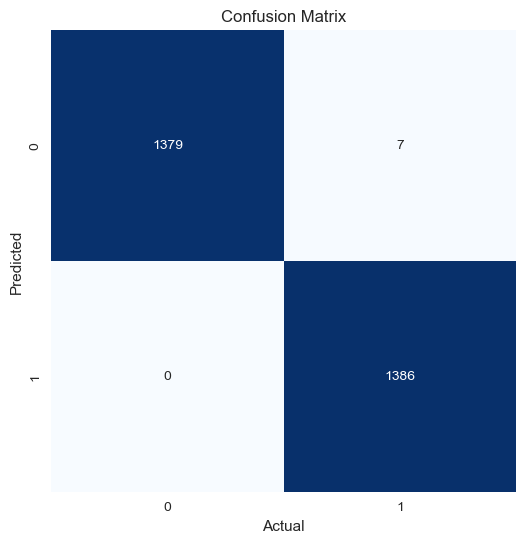

In [37]:
cm = confusion_matrix(predictions1['STATUS'],predictions1['prediction_label'])
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='.6g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [38]:
save_model(best_model, 'saved_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\cipher\AppData\Local\Temp\joblib),
          steps=[('date_feature_extractor',
                  TransformerWrapper(exclude=None, include=['TXN_DT_TIME'],
                                     transformer=ExtractDateTimeFeatures(features=['day',
                                                                                   'month',
                                                                                   'year']))),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['AC_ENTRY_SR_NO_traxlogid',
                                              'AC_NO', 'CUSTOMER_NO',...
                                     transformer=OneHotEncoder(cols=['CHANNEL',
                                                                     'EXTERNAL_AGENT_ID',
                                                                     'TRN_CODE'],
                                 

In [39]:
print(len(data.columns))
data.columns

12


Index(['AC_ENTRY_SR_NO_traxlogid', 'AC_NO', 'CHANNEL', 'CUSTOMER_NO', 'DRCR_IND', 'EXTERNAL_AGENT_ID', 'LCY_AMOUNT', 'RESPONSE_CODE', 'STATUS', 'TRN_CODE', 'TXN_DT_TIME', 'UNIQUE_ID_VALUE'], dtype='object')

In [40]:
data[data.STATUS==1][data.columns].values[2]

array([10290954, 9030019469200011, 'SuperAgentOnBoarding', 194692, 'D',
       'BAFL0214', 6000.0, '200', 1, 'ACW',
       Timestamp('2023-07-10 09:54:34'), 3230280004774], dtype=object)

In [41]:
data[data.STATUS==1]

,AC_ENTRY_SR_NO_traxlogid,AC_NO,CHANNEL,CUSTOMER_NO,DRCR_IND,EXTERNAL_AGENT_ID,LCY_AMOUNT,RESPONSE_CODE,STATUS,TRN_CODE,TXN_DT_TIME,UNIQUE_ID_VALUE
0,10290948,9040078729200014,SuperAgentOnBoarding,787292,D,BAFL0214,1000.0,200,1,ACW,2023-07-10 09:54:27,3230351966384
1,10290950,9040080704000018,SuperAgentOnBoarding,807040,D,UBL0215,1000.0,200,1,ACW,2023-07-10 09:54:28,3210381983540
2,10290954,9030019469200011,SuperAgentOnBoarding,194692,D,BAFL0214,6000.0,200,1,ACW,2023-07-10 09:54:34,3230280004774
5,10312239,9040124217900017,SuperAgentOnBoarding,1242179,D,UBL0215,1000.0,200,1,ACW,2023-07-10 12:25:23,3210153149790
10,10312249,9040129232100014,SuperAgentOnBoarding,1292321,D,BAFL0214,3000.0,200,1,ACW,2023-07-10 12:25:23,3810190968644
...,...,...,...,...,...,...,...,...,...,...,...,...
9537,10290122,9010119959700016,SuperAgentOnBoarding,1199597,D,BAFL0214,9500.0,200,1,ACW,2023-07-10 09:49:19,3340205678698
9539,10290130,9010054063100016,SuperAgentOnBoarding,540631,D,BAFL0214,9500.0,200,1,ACW,2023-07-10 09:49:23,3510312760400
9540,10290148,9040123723500014,SuperAgentOnBoarding,1237235,D,BAFL0214,1000.0,200,1,ACW,2023-07-10 09:49:30,3130245352262
9541,10290160,9030000970700018,SuperAgentOnBoarding,9707,D,BAFL0214,6000.0,200,1,ACW,2023-07-10 09:49:36,3210370096950


In [42]:
test_data.head()

,AC_ENTRY_SR_NO_traxlogid,AC_NO,CHANNEL,CUSTOMER_NO,DRCR_IND,EXTERNAL_AGENT_ID,LCY_AMOUNT,RESPONSE_CODE,STATUS,TRN_CODE,TXN_DT_TIME,UNIQUE_ID_VALUE
6094,10293598,6460120567000012,0,1205670,D,No,1000.0,0,0,DPC,2023-07-10 10:14:39,6982026
3664,10252762,9010010537100011,0,105371,C,No,7000.0,0,0,BLB,2023-07-07 17:12:10,3230230841476
1777,10299156,9060027822900012,SuperAgentOnBoarding,278229,D,BAFL0214,15000.0,200,1,ACW,2023-07-10 10:53:32,3320302606217
6516,10310281,9010006529600017,0,65296,D,No,1000.0,0,0,CHW,2023-07-10 12:11:52,3230154925008
1702,10325265,9010019622500015,SuperAgentOnBoarding,196225,D,BAFL0214,3500.0,200,1,ACW,2023-07-10 15:52:59,3230440912478


In [43]:
for r in test_data[test_data.STATUS==1].values[0]:
    print(f"'{r}'")

'10299156'
'9060027822900012'
'SuperAgentOnBoarding'
'278229'
'D'
'BAFL0214'
'15000.0'
'200'
'1'
'ACW'
'2023-07-10 10:53:32'
'3320302606217'


In [44]:
for c in test_data.columns:
    if c!="STATUS":
        print(f"{c} = st.text_input('{c}')")

AC_ENTRY_SR_NO_traxlogid = st.text_input('AC_ENTRY_SR_NO_traxlogid')
AC_NO = st.text_input('AC_NO')
CHANNEL = st.text_input('CHANNEL')
CUSTOMER_NO = st.text_input('CUSTOMER_NO')
DRCR_IND = st.text_input('DRCR_IND')
EXTERNAL_AGENT_ID = st.text_input('EXTERNAL_AGENT_ID')
LCY_AMOUNT = st.text_input('LCY_AMOUNT')
RESPONSE_CODE = st.text_input('RESPONSE_CODE')
TRN_CODE = st.text_input('TRN_CODE')
TXN_DT_TIME = st.text_input('TXN_DT_TIME')
UNIQUE_ID_VALUE = st.text_input('UNIQUE_ID_VALUE')


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9172 entries, 1555 to 9542
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   AC_ENTRY_SR_NO_traxlogid  9172 non-null   int64         
 1   AC_NO                     9172 non-null   int64         
 2   CHANNEL                   9172 non-null   object        
 3   CUSTOMER_NO               9172 non-null   int64         
 4   DRCR_IND                  9172 non-null   object        
 5   EXTERNAL_AGENT_ID         9172 non-null   object        
 6   LCY_AMOUNT                9172 non-null   float64       
 7   RESPONSE_CODE             9172 non-null   object        
 8   STATUS                    9172 non-null   int64         
 9   TRN_CODE                  9172 non-null   object        
 10  TXN_DT_TIME               9172 non-null   datetime64[ns]
 11  UNIQUE_ID_VALUE           9172 non-null   int64         
dtypes: datetime64[ns]

In [ ]:
%pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install pyodbc
%pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [46]:
import sqlalchemy
import pyodbc

In [47]:
pyodbc.drivers()

['SQL Server',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)',
 'Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)',
 'SQL Server Native Client 11.0',
 'ODBC Driver 17 for SQL Server',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 18 for SQL Server']

In [84]:
import pyodbc
import pandas as pd
server = '.' 
database = 'BAHL_AI_DB' 
username = 'sa' 
password = 'cip321--'  
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()
query = ("select AC_ENTRY_SR_NO_traxlogid,AC_NO,TRN_CODE,DRCR_IND,LCY_AMOUNT,TXN_DT_TIME,CUSTOMER_NO,UNIQUE_ID_VALUE,RESPONSE_CODE,CHANNEL,EXTERNAL_AGENT_ID,STATUS from BOP_trans;")
data_set_sql = pd.read_sql(query, cnxn)
print(data_set_sql.head())


   AC_ENTRY_SR_NO_traxlogid             AC_NO TRN_CODE DRCR_IND  LCY_AMOUNT         TXN_DT_TIME  CUSTOMER_NO  UNIQUE_ID_VALUE RESPONSE_CODE               CHANNEL EXTERNAL_AGENT_ID      STATUS
0                  10290948  9040078729200014      ACW        D      1000.0 2023-07-10 09:54:27       787292    3230351966384           200  SuperAgentOnBoarding          BAFL0214     Suspect
1                  10290950  9040080704000018      ACW        D      1000.0 2023-07-10 09:54:28       807040    3210381983540           200  SuperAgentOnBoarding           UBL0215     Suspect
2                  10290954  9030019469200011      ACW        D      6000.0 2023-07-10 09:54:34       194692    3230280004774           200  SuperAgentOnBoarding          BAFL0214     Suspect
3                  10312233  6460120567000012      DPC        D      6000.0 2023-07-10 12:25:22      1205670          6982026          NULL                  NULL              NULL  No Suspect
4                  10312235  64601205670

In [85]:
data_set_sql

,AC_ENTRY_SR_NO_traxlogid,AC_NO,TRN_CODE,DRCR_IND,LCY_AMOUNT,TXN_DT_TIME,CUSTOMER_NO,UNIQUE_ID_VALUE,RESPONSE_CODE,CHANNEL,EXTERNAL_AGENT_ID,STATUS
0,10290948,9040078729200014,ACW,D,1000.0,2023-07-10 09:54:27,787292,3230351966384,200,SuperAgentOnBoarding,BAFL0214,Suspect
1,10290950,9040080704000018,ACW,D,1000.0,2023-07-10 09:54:28,807040,3210381983540,200,SuperAgentOnBoarding,UBL0215,Suspect
2,10290954,9030019469200011,ACW,D,6000.0,2023-07-10 09:54:34,194692,3230280004774,200,SuperAgentOnBoarding,BAFL0214,Suspect
3,10312233,6460120567000012,DPC,D,6000.0,2023-07-10 12:25:22,1205670,6982026,NULL,NULL,NULL,No Suspect
4,10312235,6460120567000012,DPC,D,6000.0,2023-07-10 12:25:23,1205670,6982026,NULL,NULL,NULL,No Suspect
...,...,...,...,...,...,...,...,...,...,...,...,...
9543,10312219,6460120566800013,DPC,D,3000.0,2023-07-10 12:25:21,1205668,8011648,NULL,NULL,NULL,No Suspect
9544,10312221,6460120566800013,DPC,D,3000.0,2023-07-10 12:25:22,1205668,8011648,NULL,NULL,NULL,No Suspect
9545,10312227,6460120566800013,DPC,D,3000.0,2023-07-10 12:25:22,1205668,8011648,NULL,NULL,NULL,No Suspect
9546,10312229,6460120567000012,DPC,D,9000.0,2023-07-10 12:25:22,1205670,6982026,NULL,NULL,NULL,No Suspect


In [86]:
cleanup_nums = {
                "STATUS":{"Suspect":1,"No Suspect":0}
                 }

In [87]:
data_set = data_set_sql.replace(cleanup_nums)
#df2['STATUS']=data['STATUS'].astype(bool)
data_set.head(4)

,AC_ENTRY_SR_NO_traxlogid,AC_NO,TRN_CODE,DRCR_IND,LCY_AMOUNT,TXN_DT_TIME,CUSTOMER_NO,UNIQUE_ID_VALUE,RESPONSE_CODE,CHANNEL,EXTERNAL_AGENT_ID,STATUS
0,10290948,9040078729200014,ACW,D,1000.0,2023-07-10 09:54:27,787292,3230351966384,200,SuperAgentOnBoarding,BAFL0214,1
1,10290950,9040080704000018,ACW,D,1000.0,2023-07-10 09:54:28,807040,3210381983540,200,SuperAgentOnBoarding,UBL0215,1
2,10290954,9030019469200011,ACW,D,6000.0,2023-07-10 09:54:34,194692,3230280004774,200,SuperAgentOnBoarding,BAFL0214,1
3,10312233,6460120567000012,DPC,D,6000.0,2023-07-10 12:25:22,1205670,6982026,NULL,NULL,NULL,0


In [88]:

print(data_set.columns)

Index(['AC_ENTRY_SR_NO_traxlogid', 'AC_NO', 'TRN_CODE', 'DRCR_IND', 'LCY_AMOUNT', 'TXN_DT_TIME', 'CUSTOMER_NO', 'UNIQUE_ID_VALUE', 'RESPONSE_CODE', 'CHANNEL', 'EXTERNAL_AGENT_ID', 'STATUS'], dtype='object')


In [89]:
data3=data_set[['AC_ENTRY_SR_NO_traxlogid', 'AC_NO', 'CHANNEL', 'CUSTOMER_NO', 'DRCR_IND', 'EXTERNAL_AGENT_ID', 'LCY_AMOUNT','RESPONSE_CODE', 'TRN_CODE', 'TXN_DT_TIME', 'UNIQUE_ID_VALUE']]
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9548 entries, 0 to 9547
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   AC_ENTRY_SR_NO_traxlogid  9548 non-null   int64         
 1   AC_NO                     9548 non-null   int64         
 2   CHANNEL                   9548 non-null   object        
 3   CUSTOMER_NO               9548 non-null   int64         
 4   DRCR_IND                  9548 non-null   object        
 5   EXTERNAL_AGENT_ID         9548 non-null   object        
 6   LCY_AMOUNT                9548 non-null   float64       
 7   RESPONSE_CODE             9548 non-null   object        
 8   TRN_CODE                  9548 non-null   object        
 9   TXN_DT_TIME               9548 non-null   datetime64[ns]
 10  UNIQUE_ID_VALUE           9548 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 820.7+ KB


In [90]:
predictions = predict_model(estimator=best_model, data=data3)
predictions.head(100)

,AC_ENTRY_SR_NO_traxlogid,AC_NO,CHANNEL,CUSTOMER_NO,DRCR_IND,EXTERNAL_AGENT_ID,LCY_AMOUNT,RESPONSE_CODE,TRN_CODE,TXN_DT_TIME,UNIQUE_ID_VALUE,prediction_label
0,10290948,9040078729200014,SuperAgentOnBoarding,787292,D,BAFL0214,1000.0,200,ACW,2023-07-10 09:54:27,3230351966384,1
1,10290950,9040080704000018,SuperAgentOnBoarding,807040,D,UBL0215,1000.0,200,ACW,2023-07-10 09:54:28,3210381983540,1
2,10290954,9030019469200011,SuperAgentOnBoarding,194692,D,BAFL0214,6000.0,200,ACW,2023-07-10 09:54:34,3230280004774,1
3,10312233,6460120567000012,NULL,1205670,D,NULL,6000.0,NULL,DPC,2023-07-10 12:25:22,6982026,0
4,10312235,6460120567000012,NULL,1205670,D,NULL,6000.0,NULL,DPC,2023-07-10 12:25:23,6982026,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,10312327,9060096004900013,SuperAgentOnBoarding,960049,D,UBL0215,12000.0,200,ACW,2023-07-10 12:25:40,3320271179159,1
96,10312377,9040120706300017,SuperAgentOnBoarding,1207063,D,BAFL0214,1000.0,200,ACW,2023-07-10 12:26:21,3110173453424,1
97,10326237,9060052951500019,SuperAgentOnBoarding,529515,D,BAFL0214,3000.0,200,ACW,2023-07-10 16:15:56,3230325576843,1
98,10326261,9010032864100013,SuperAgentOnBoarding,328641,D,BAFL0214,9500.0,200,ACW,2023-07-10 16:16:28,3240214076202,1


In [91]:
predictions=predictions[['prediction_label']]


In [92]:
data_set['prediction_label']=predictions['prediction_label']
#df2['prediction_label']=df2['prediction_label'].astype(str)
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9548 entries, 0 to 9547
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   AC_ENTRY_SR_NO_traxlogid  9548 non-null   int64         
 1   AC_NO                     9548 non-null   int64         
 2   TRN_CODE                  9548 non-null   object        
 3   DRCR_IND                  9548 non-null   object        
 4   LCY_AMOUNT                9548 non-null   float64       
 5   TXN_DT_TIME               9548 non-null   datetime64[ns]
 6   CUSTOMER_NO               9548 non-null   int64         
 7   UNIQUE_ID_VALUE           9548 non-null   int64         
 8   RESPONSE_CODE             9548 non-null   object        
 9   CHANNEL                   9548 non-null   object        
 10  EXTERNAL_AGENT_ID         9548 non-null   object        
 11  STATUS                    9548 non-null   int64         
 12  prediction_label    

In [93]:
server = '.' 
database = 'BAHL_AI_DB' 
username = 'sa' 
password = 'cip321--'  
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)


# Update query

#update_query = "UPDATE BOP_trans SET prediction_label = '0' WHERE AC_ENTRY_SR_NO_traxlogid = '10290954'"

try:
    for row in data_set[['AC_ENTRY_SR_NO_traxlogid','prediction_label']].values:
    # Execute the update query
      cursor = cnxn.cursor()
      cursor.execute(f"UPDATE BOP_trans SET prediction_label = {row[1]} WHERE AC_ENTRY_SR_NO_traxlogid = {row[0]}")

    # Commit the changes to the database
      cnxn.commit()
      print("Update successful!")
except Exception as e:
    # Handle any errors
    cnxn.rollback()
    print("Error:", str(e))
finally:
    # Close the connection
    cursor.close()
    cnxn.close()

Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update succe

In [96]:
import pyodbc
import pandas as pd
server = '.' 
database = 'BAHL_AI_DB' 
username = 'sa' 
password = 'cip321--'  
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()
query = ("SELECT TOP 3000 AC_ENTRY_SR_NO_traxlogid, AC_NO,TRN_CODE,DRCR_IND,LCY_AMOUNT,TXN_DT_TIME,CUSTOMER_NO, UNIQUE_ID_VALUE,CHANNEL,RESPONSE_CODE,EXTERNAL_AGENT_ID FROM BOP_trans WHERE (STATUS = 'No Suspect') OR (STATUS = 'No Suspect' AND prediction_label<> 0);")
datalas = pd.read_sql(query, cnxn)
print(datalas.head())


   AC_ENTRY_SR_NO_traxlogid             AC_NO TRN_CODE DRCR_IND  LCY_AMOUNT         TXN_DT_TIME  CUSTOMER_NO  UNIQUE_ID_VALUE CHANNEL RESPONSE_CODE EXTERNAL_AGENT_ID
0                  10312233  6460120567000012      DPC        D      6000.0 2023-07-10 12:25:22      1205670          6982026    NULL          NULL              NULL
1                  10312235  6460120567000012      DPC        D      6000.0 2023-07-10 12:25:23      1205670          6982026    NULL          NULL              NULL
2                  10312241  6460120567000012      DPC        D      6000.0 2023-07-10 12:25:23      1205670          6982026    NULL          NULL              NULL
3                  10312243  6460120567000012      DPC        D     25000.0 2023-07-10 12:25:23      1205670          6982026    NULL          NULL              NULL
4                  10312245  6460120566800013      DPC        D      1000.0 2023-07-10 12:25:23      1205668          8011648    NULL          NULL              NULL


In [97]:
predictions = predict_model(estimator=best_model, data=datalas)
predictions.head(100)

,AC_ENTRY_SR_NO_traxlogid,AC_NO,TRN_CODE,DRCR_IND,LCY_AMOUNT,TXN_DT_TIME,CUSTOMER_NO,UNIQUE_ID_VALUE,CHANNEL,RESPONSE_CODE,EXTERNAL_AGENT_ID,prediction_label
0,10312233,6460120567000012,DPC,D,6000.0,2023-07-10 12:25:22,1205670,6982026,NULL,NULL,NULL,0
1,10312235,6460120567000012,DPC,D,6000.0,2023-07-10 12:25:23,1205670,6982026,NULL,NULL,NULL,0
2,10312241,6460120567000012,DPC,D,6000.0,2023-07-10 12:25:23,1205670,6982026,NULL,NULL,NULL,0
3,10312243,6460120567000012,DPC,D,25000.0,2023-07-10 12:25:23,1205670,6982026,NULL,NULL,NULL,0
4,10312245,6460120566800013,DPC,D,1000.0,2023-07-10 12:25:23,1205668,8011648,NULL,NULL,NULL,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,10288370,9010115149300012,CHW,D,9500.0,2023-07-10 09:34:42,1151493,3810431862352,NULL,NULL,NULL,0
96,10282814,9010091635000011,CHW,D,1000.0,2023-07-09 21:13:48,916350,3230216511502,NULL,NULL,NULL,0
97,10282826,9010120436100010,CHW,D,2000.0,2023-07-09 21:19:48,1204361,3510205884680,NULL,NULL,NULL,0
98,10282844,9010109409400018,CHW,D,9500.0,2023-07-09 21:25:12,1094094,3640267829960,NULL,NULL,NULL,0


In [98]:
predictions=predictions[['prediction_label']]

In [99]:
datalas['prediction_label']=predictions['prediction_label']
#df2['prediction_label']=df2['prediction_label'].astype(str)
datalas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   AC_ENTRY_SR_NO_traxlogid  3000 non-null   int64         
 1   AC_NO                     3000 non-null   int64         
 2   TRN_CODE                  3000 non-null   object        
 3   DRCR_IND                  3000 non-null   object        
 4   LCY_AMOUNT                3000 non-null   float64       
 5   TXN_DT_TIME               3000 non-null   datetime64[ns]
 6   CUSTOMER_NO               3000 non-null   int64         
 7   UNIQUE_ID_VALUE           3000 non-null   int64         
 8   CHANNEL                   3000 non-null   object        
 9   RESPONSE_CODE             3000 non-null   object        
 10  EXTERNAL_AGENT_ID         3000 non-null   object        
 11  prediction_label          3000 non-null   int32         
dtypes: datetime64[ns](1)

In [100]:
server = '.' 
database = 'BAHL_AI_DB' 
username = 'sa' 
password = 'cip321--'  
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)


# Update query

#update_query = "UPDATE BOP_trans SET prediction_label = '0' WHERE AC_ENTRY_SR_NO_traxlogid = '10290954'"

try:
    for row in datalas[['AC_ENTRY_SR_NO_traxlogid','prediction_label']].values:
    # Execute the update query
      cursor = cnxn.cursor()
      cursor.execute(f"UPDATE BOP_trans SET prediction_label = {row[1]} WHERE AC_ENTRY_SR_NO_traxlogid = {row[0]}")

    # Commit the changes to the database
      cnxn.commit()
      print("Update successful!")
except Exception as e:
    # Handle any errors
    cnxn.rollback()
    print("Error:", str(e))
finally:
    # Close the connection
    cursor.close()
    cnxn.close()

Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update successful!
Update succe